In [ ]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("tips.csv", encoding='latin1')

In [4]:
df

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.33,Win,True
...,...,...,...,...,...,...,...,...,...,...
38243,38244,605,Tipster E1,02/04/2016,Kempton,Solar Flair,Win,7.00,Lose,False
38244,38245,606,Tipster E1,02/04/2016,Doncaster,Express Himself,Each Way,12.00,Lose,False
38245,38246,607,Tipster E1,02/04/2016,Doncaster,Jack Dexter,Win,7.00,Lose,False
38246,38247,608,Tipster E1,02/04/2016,Kelso,Just Cameron,Win,4.33,Lose,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38248 entries, 0 to 38247
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UID            38248 non-null  int64  
 1   ID             38248 non-null  int64  
 2   Tipster        38248 non-null  object 
 3   Date           38248 non-null  object 
 4   Track          38248 non-null  object 
 5   Horse          38248 non-null  object 
 6   Bet Type       38248 non-null  object 
 7   Odds           38248 non-null  float64
 8   Result         38248 non-null  object 
 9   TipsterActive  38248 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 2.7+ MB


In [6]:
df.describe()

,UID,ID,Odds
count,38248.000000,38248.000000,38248.000000
mean,19124.500000,1013.308251,10.994968
std,11041.390885,917.941098,11.004589
min,1.000000,1.000000,1.070000
25%,9562.750000,318.000000,5.000000
50%,19124.500000,749.000000,8.000000
75%,28686.250000,1419.000000,13.000000
max,38248.000000,4383.000000,407.000000


In [7]:
df.isnull().sum()

UID              0
ID               0
Tipster          0
Date             0
Track            0
Horse            0
Bet Type         0
Odds             0
Result           0
TipsterActive    0
dtype: int64

In [8]:
df['Tipster'].value_counts()

Tipster X     4383
Tipster E     3700
Tipster B1    2497
Tipster A1    2446
Tipster D1    2119
Tipster J     1937
Tipster R     1901
Tipster C     1738
Tipster Q     1552
Tipster Y     1469
Tipster L     1425
Tipster T     1332
Tipster A     1331
Tipster O     1094
Tipster W      994
Tipster M      957
Tipster Z      883
Tipster H      833
Tipster D      741
Tipster E1     609
Tipster P      581
Tipster B      503
Tipster C1     501
Tipster I      453
Tipster N      415
Tipster V      406
Tipster U      383
Tipster S      383
Tipster G      290
Tipster K      246
Tipster F      146
Name: Tipster, dtype: int64

In [9]:
df1=df[['Tipster','Track','Horse','Bet Type','Odds','Result','TipsterActive']]

In [ ]:
df2=df1
from sklearn.preprocessing import LabelEncoder
for c in df2.columns:
    if df2[c].dtype=='object':
        df2[c] = df2[c].fillna('N')
        lbl = LabelEncoder()
        lbl.fit(list(df2[c].values))
        df2[c] = lbl.transform(df2[c].values)

In [11]:
df2 = df1
df1

,Tipster,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,0,2,5158,1,8.00,0,True
1,0,96,13108,1,4.50,0,True
2,0,114,13411,1,7.00,0,True
3,0,74,8976,1,5.00,0,True
4,0,2,10554,1,4.33,1,True
...,...,...,...,...,...,...,...
38243,9,54,12946,1,7.00,0,False
38244,9,26,4591,0,12.00,0,False
38245,9,26,6824,1,7.00,0,False
38246,9,53,7068,1,4.33,0,False


In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df1.copy()

# Initialize LabelEncoder
lbl = LabelEncoder()

# Fill missing values with 'N'
df_encoded['TipsterActive'] = df_encoded['TipsterActive'].fillna('N')

# Fit and transform the 'TipsterActive' column
df_encoded['TipsterActive'] = lbl.fit_transform(df_encoded['TipsterActive'])

# Display the encoded DataFrame
print(df_encoded.head())


   Tipster  Track  Horse  Bet Type  Odds  Result  TipsterActive
0        0      2   5158         1  8.00       0              1
1        0     96  13108         1  4.50       0              1
2        0    114  13411         1  7.00       0              1
3        0     74   8976         1  5.00       0              1
4        0      2  10554         1  4.33       1              1


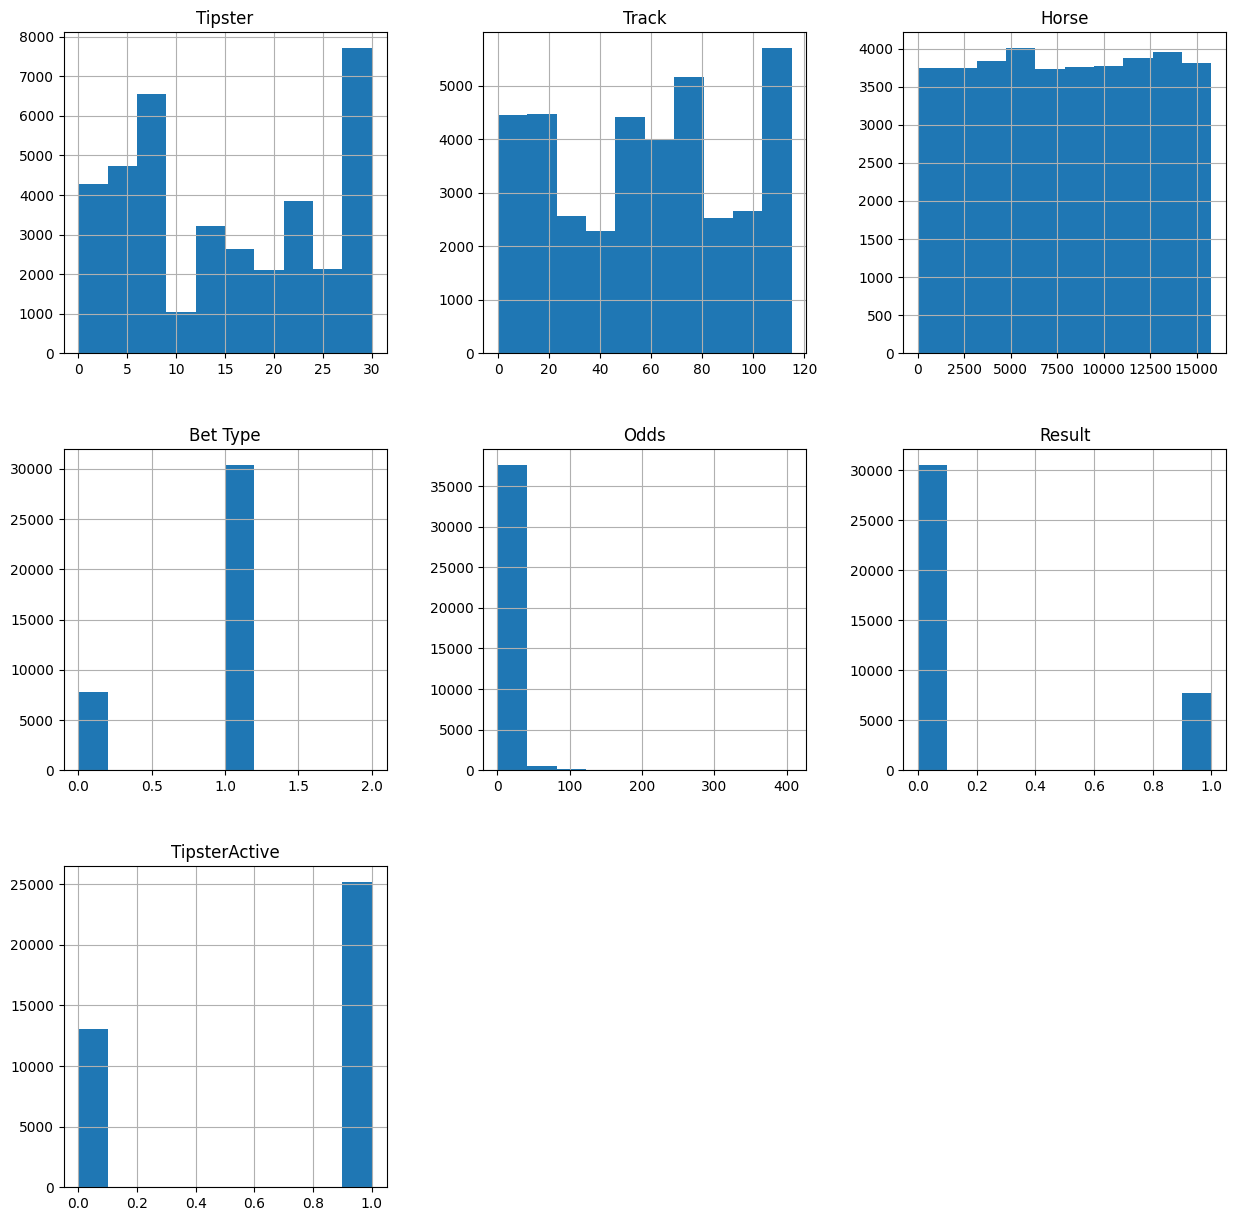

In [52]:
df_encoded.iloc[:,:].hist(figsize=(15,15))
plt.show()

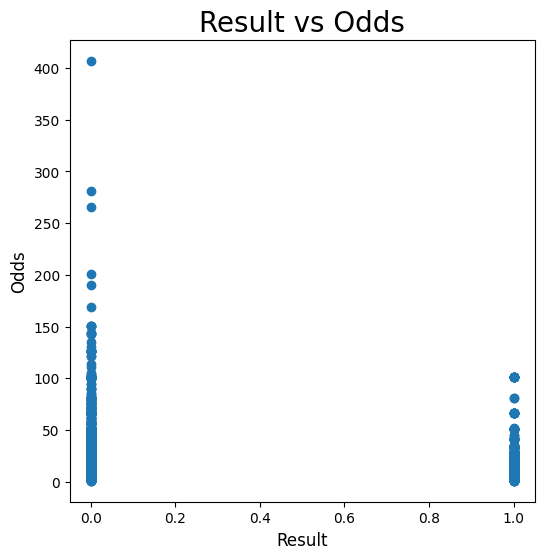

In [53]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('Result vs Odds',fontsize=20)
ax.set_ylabel('Odds',fontsize=12)
ax.set_xlabel('Result',fontsize=12)
ax.scatter(df_encoded['Result'],df_encoded['Odds'])

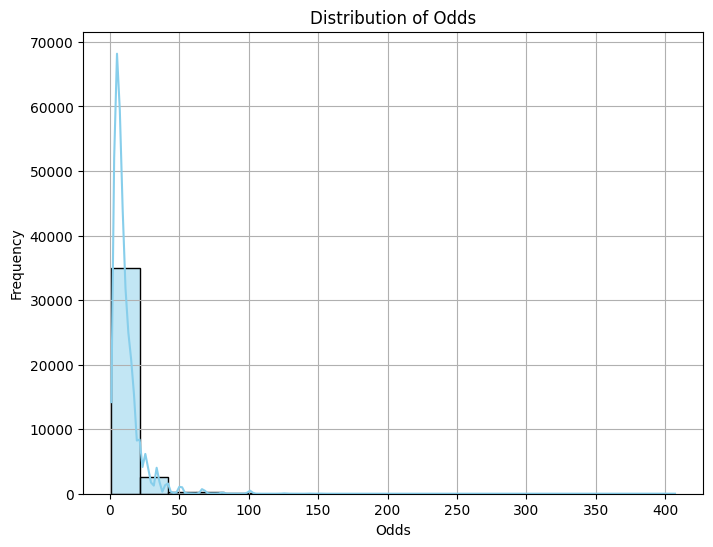

<ipython-input-54-cb52ec95bba6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y='Odds', data=df_encoded, palette='pastel')


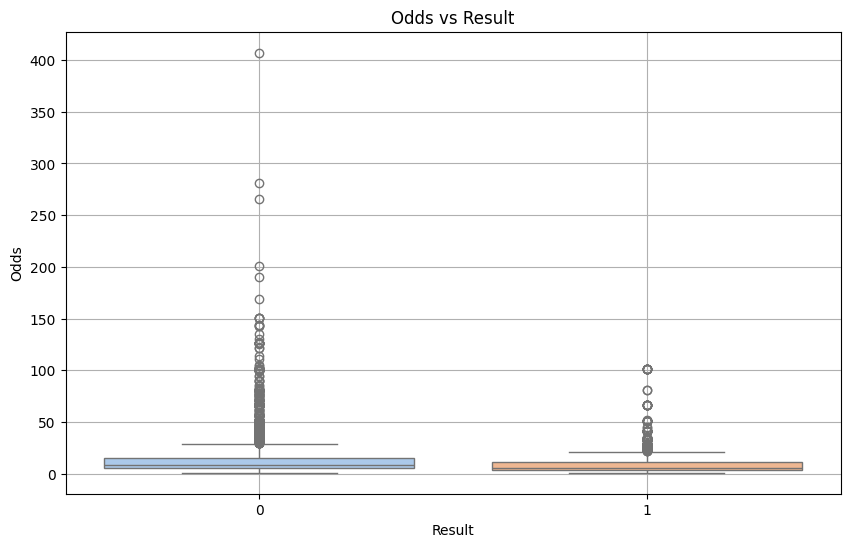

In [54]:
# Histogram of 'Odds'
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['Odds'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Odds')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of 'Odds' vs 'Result'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='Odds', data=df_encoded, palette='pastel')
plt.title('Odds vs Result')
plt.xlabel('Result')
plt.ylabel('Odds')
plt.grid(True)
plt.show()


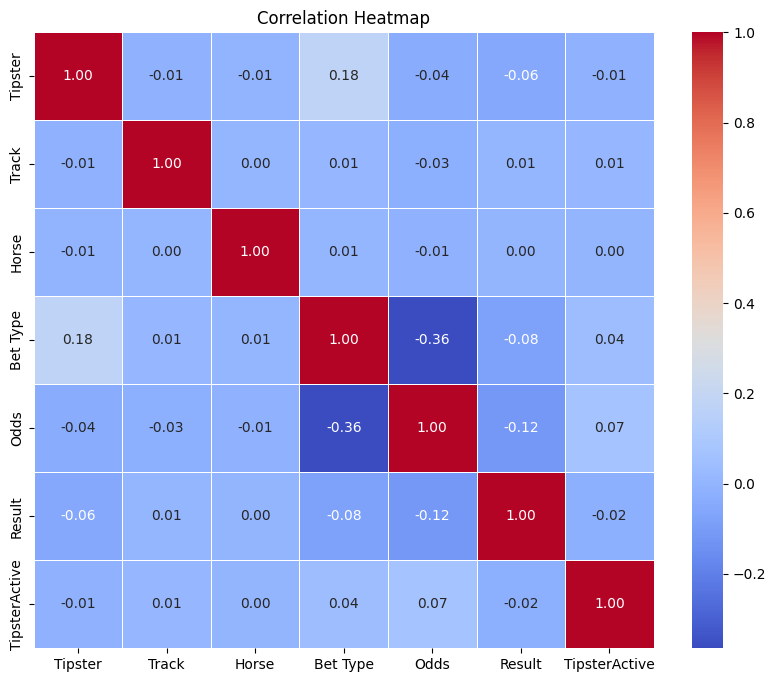

In [55]:
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['Result'])  # Features are all columns except 'Result'
y = df_encoded['Result']  # Target variable is 'Result'


In [57]:
# Display the first few rows of the features
print("Features (X):")
print(X.head())

# Display the first few rows of the target variable
print("\nTarget Variable (y):")
print(y.head())

Features (X):
   Tipster  Track  Horse  Bet Type  Odds  TipsterActive
0        0      2   5158         1  8.00              1
1        0     96  13108         1  4.50              1
2        0    114  13411         1  7.00              1
3        0     74   8976         1  5.00              1
4        0      2  10554         1  4.33              1

Target Variable (y):
0    0
1    0
2    0
3    0
4    1
Name: Result, dtype: int64


In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (26773, 6) (26773,)
Testing set shape: (11475, 6) (11475,)


In [59]:
headers = X.columns

In [60]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train,columns=headers).head()

,Tipster,Track,Horse,Bet Type,Odds,TipsterActive
14363,18,74,3347,1,4.5,0
983,0,61,13600,0,9.0,1
9084,12,96,14127,1,5.5,0
34821,3,83,2100,1,2.5,0
29842,30,43,14396,1,5.0,0


In [61]:
X_train_scaled

array([[ 0.34180163,  0.46582607, -0.9985699 ,  0.50567813, -0.58608273,
        -1.39289244],
       [-1.49469428,  0.09396588,  1.25374029, -1.97663222, -0.18035191,
         0.71793052],
       [-0.27036367,  1.09512791,  1.36950811,  0.50567813, -0.49592032,
        -1.39289244],
       ...,
       [-0.57644633,  0.9807094 , -1.6646193 ,  0.50567813, -0.45083912,
        -1.39289244],
       [-1.49469428,  0.46582607, -0.86193312,  0.50567813, -0.31559552,
         0.71793052],
       [ 0.44382918, -0.10626652,  0.96377156,  0.50567813,  0.90159691,
         0.71793052]])

In [62]:
X_test_scaled

array([[-6.78473876e-01,  3.67566230e-02, -5.49997054e-01,
         5.05678135e-01, -4.95920323e-01,  7.17930524e-01],
       [ 1.46410469e+00, -1.36487022e+00,  8.33505298e-01,
         5.05678135e-01, -3.15595518e-01, -1.39289244e+00],
       [-4.74418775e-01, -6.21149855e-01, -5.13386962e-02,
        -1.97663222e+00, -4.95920323e-01, -1.39289244e+00],
       ...,
       [-8.82528978e-01,  1.22570511e-01, -5.40111756e-01,
         5.05678135e-01, -3.60676719e-01,  7.17930524e-01],
       [-6.78473876e-01, -6.49754484e-01,  1.36775073e+00,
         5.05678135e-01, -2.71096754e-05,  7.17930524e-01],
       [ 9.53966937e-01,  4.08616806e-01, -4.14533984e-02,
         5.05678135e-01, -2.71096754e-05,  7.17930524e-01]])

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Make Predictions
y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
print(acc_log)
# 4. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

79.84
Accuracy: 0.8009586056644881
Precision: 1.0
Recall: 0.000437636761487965
F1-score: 0.0008748906386701663


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.3140028979084772
Mean Squared Error: 0.15400775738433634
Root Mean Squared Error: 0.3924382211053561
R-squared: 0.03429102090175773


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print accuracy
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.6996949891067538


In [79]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.7773420479302833
